In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util

# Set seed here
import random
import numpy as np
seed = 123459
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=1000, shuffle=True);

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 1000, (32, 32))

CIFAR_generated = FID_util.load_generated("./generated_images/cifar_generated/*.png", 1000)

Files already downloaded and verified


In [3]:
FID_util.compute_FID(CIFAR_train, CIFAR_generated)

tensor(0.5221)

In [4]:
FID_util.compute_transform_FID(transforms.functional.adjust_saturation, 2.4, CIFAR_train, CIFAR_generated)

2.4485456943511963

In [5]:
FID_util.compute_transform_FID(transforms.functional.adjust_sharpness, 0.5, CIFAR_train, CIFAR_generated)

0.6270950436592102

CIFAR: 0.4913013279438019


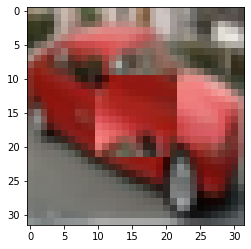

In [6]:
print(f"CIFAR: {FID_util.rotate_chunk((10, 10, 22, 22), CIFAR_train, CIFAR_generated)}")

In [7]:
FID_util.compute_transform_FID(transforms.functional.gaussian_blur, [7,7] , CIFAR_train, CIFAR_generated)

1.1458255052566528

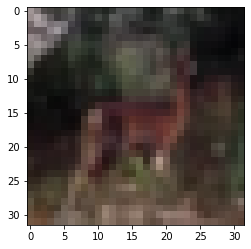

In [8]:
FID_util.display_image(CIFAR_generated[7])